## Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

    'Daily Time Spent on Site': consumer time on site in minutes
    'Age': cutomer age in years
    'Area Income': Avg. Income of geographical area of consumer
    'Daily Internet Usage': Avg. minutes a day consumer is on the internet
    'Ad Topic Line': Headline of the advertisement
    'City': City of consumer
    'Male': Whether or not consumer was male
    'Country': Country of consumer
    'Timestamp': Time at which consumer clicked on Ad or closed window
    'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

### Getting the Data

In [3]:
ad_data = pd.read_csv("advertising.csv")

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Exploratory Data Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

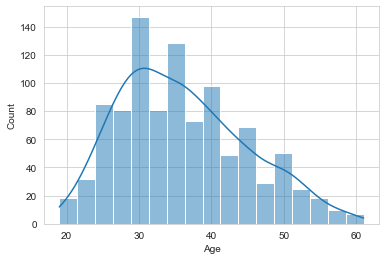

In [7]:
sns.histplot(ad_data['Age'], kde=True)

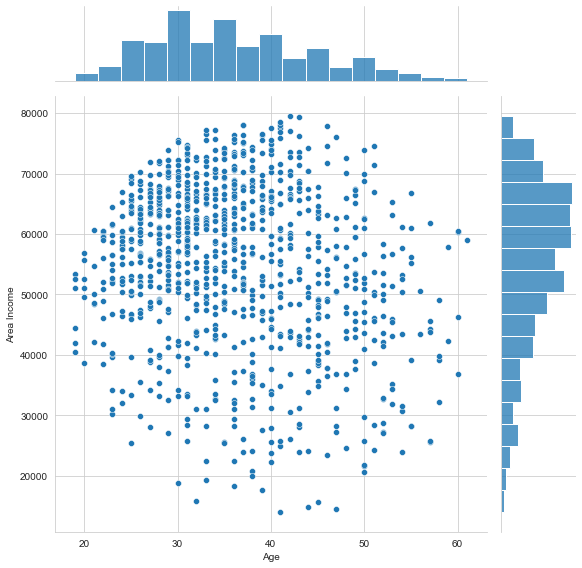

In [8]:
sns.jointplot(x="Age",y="Area Income", data=ad_data, height=8)

##### This is a jointplot showing Area Income versus Age.
##### We can see that more people aged between 30 to 40 are spending more time on site daily.


<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

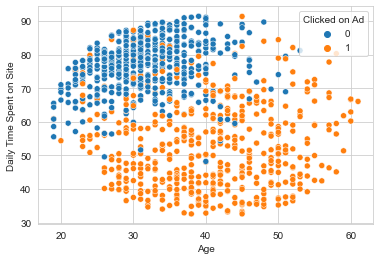

In [29]:
# scatterplot of daily time spent on site and age with clicking ads as hue
sns.scatterplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = ad_data) 

##### This is a scatter plot showing the kde distributions of Daily Time spent on site vs. Age.
##### We can see that more people aged between 20 to 40 are spending more time on site daily but less chances of them to click on the ads.

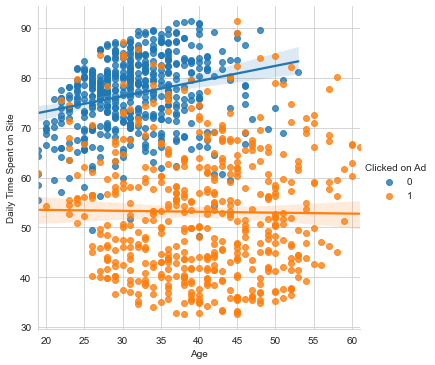

In [11]:
# Jointplot of daily time spent on site and age clicking ads as hue
sns.lmplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = ad_data) 

##### We can see that people that are younger and spends more time on site click on the ads less and people who are in between 25-55 and spends less time click on the ads more.

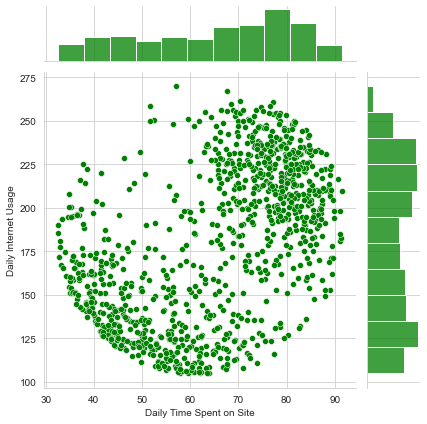

In [12]:
sns.jointplot(x="Daily Time Spent on Site", y="Daily Internet Usage",color='green', data=ad_data)

##### This is another jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'

## Distribution and Relationship Between Variables

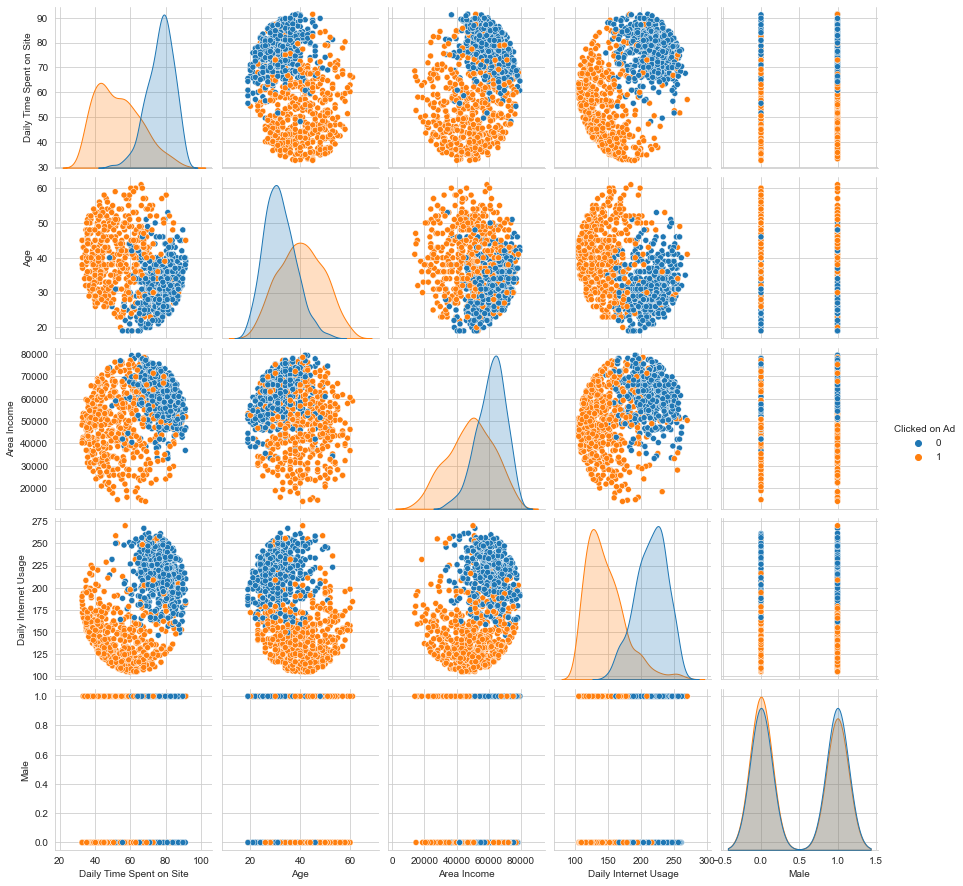

In [14]:
sns.pairplot(data=ad_data, hue="Clicked on Ad")

#### For a change of pace, here's a pairplot with the hue defined by the 'Clicked on Ad' column feature.

#### Pairplot represents the relationship between our target feature/variable and explanatory variables. It provides the possible direction of the relationship between the variables. We can see that people who spend less time on site and have less income and are aged more relatively are tend to click on ad.

<AxesSubplot:>

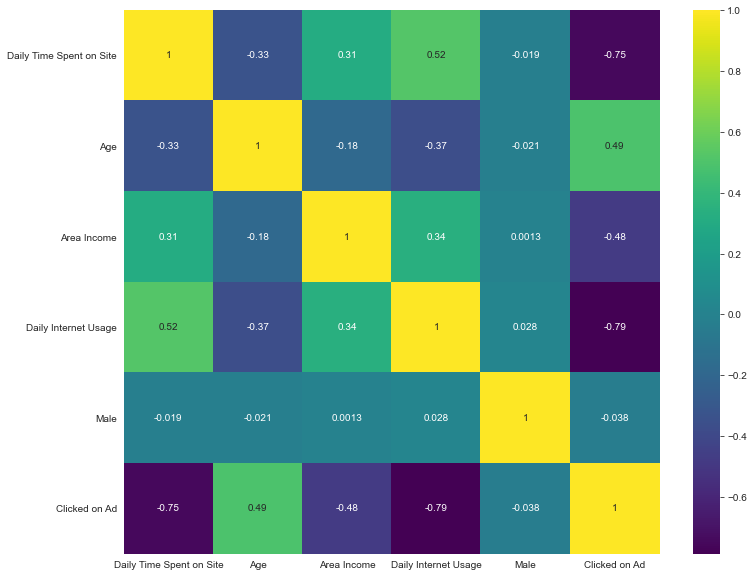

In [15]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(ad_data.corr(), cmap='viridis', annot = True) 
# Degree of relationship i.e correlation using heatmap

#### Heatmap gives us better understanding of relationship between each feature. Correlation is measured between -1 and 1. Higher the absolute value, higher is the degree of correlation between the variables. We expect daily internet usage and daily time spent on site to be more correlated with our target variable. Also, none of our explantory variables seems to correlate with each other which indicates there is no collinearity in our data.

## Logistic Regression Algorithm

##### First we do a train test split and train our Model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

#### Our Goal is to predict when a user clicks on the ad or not. We drop all non-numeric Data

In [18]:
X = ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Clicked on Ad'], axis=1)
y = ad_data['Clicked on Ad']

In [19]:
print(X.head())
print(y.head())

   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                     68.95   35     61833.90                256.09     0
1                     80.23   31     68441.85                193.77     1
2                     69.47   26     59785.94                236.50     0
3                     74.15   29     54806.18                245.89     1
4                     68.37   35     73889.99                225.58     0
0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Train and fit a logistic regression model on the training set

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel = LogisticRegression()

In [23]:
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations

In [24]:
#### Now predict the values for the testing data

In [25]:
predictions = logmodel.predict(X_test)

#### Creating a classsification report for the model

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [35]:
# Printing the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[149   8]
 [ 14 129]]


In [ ]:
The results from evaluation are as follows:

Confusion Matrix:

The users that are predicted to click on commercials and the actually clicked users were 154, the people who were predicted not to click on the commercials and actually did not click on them were 170.

The people who were predicted to click on commercial and actually did not click on them are 1, and the users who were not predicted to click on the commercials and actually clicked on them are 5.

We have only a few mislabelled points which is not bad from the given size of the dataset.

Classification Report:

From the report obtained, the precision & recall are 0.93 which depicts the predicted values are 93% accurate. Hence the probability that the user can click on the commercial is 0.93 which is a great precision value to get a good model.